In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df = pd.read_csv('Hanoi_Census_2020.csv', index_col='ward_id').loc[:, 'ward':]
df.head()

,ward,ward_level,area,pop_density,population,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home
ward_id,,,,,,,,,,,
1,Phuong Phuc Xa,Phuong,0.894,24.562,"21,946","1,238","7,796","8,321","4,591","5,863","5,855"
4,Phuong Truc Bach,Phuong,0.506,13.962,"7,065",320,"2,301","2,475","1,969","1,948","1,948"
6,Phuong Vinh Phuc,Phuong,0.715,33.376,"23,867","1,486","8,557","8,997","4,827","6,314","6,298"
7,Phuong Cong Vi,Phuong,0.538,29.723,"15,979",856,"5,577","5,983","3,563","4,357","4,349"
8,Phuong Lieu Giai,Phuong,0.681,30.974,"21,084","1,153","7,400","7,819","4,712","5,639","5,637"


## 1. Data Transformation

* Change string to int in children, male, female, household
* Transform age group to percentage of population

In [88]:
for i in df.loc[:, 'population':].columns:
    df[i] = df[i].str.replace(',', '')
    
df.loc[:, 'population':] = df.loc[:, 'population':].astype(int)

,ward,ward_level,area,pop_density,population,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home
ward_id,,,,,,,,,,,
1,Phuong Phuc Xa,Phuong,0.894,24.562,21946,1238,7796,8321,4591,5863,5855
4,Phuong Truc Bach,Phuong,0.506,13.962,7065,320,2301,2475,1969,1948,1948
6,Phuong Vinh Phuc,Phuong,0.715,33.376,23867,1486,8557,8997,4827,6314,6298
7,Phuong Cong Vi,Phuong,0.538,29.723,15979,856,5577,5983,3563,4357,4349
8,Phuong Lieu Giai,Phuong,0.681,30.974,21084,1153,7400,7819,4712,5639,5637


In [89]:
df.loc[:, 'population':] = df.loc[:, 'population':].astype(int)

In [90]:
for i in range(5, 9, 1):
    df.iloc[:, i] = df.iloc[:, i] / df['population']
    
df.head()

,ward,ward_level,area,pop_density,population,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home
ward_id,,,,,,,,,,,
1,Phuong Phuc Xa,Phuong,0.894,24.562,21946,0.056411,0.355236,0.379158,0.209195,5863,5855
4,Phuong Truc Bach,Phuong,0.506,13.962,7065,0.045294,0.325690,0.350318,0.278698,1948,1948
6,Phuong Vinh Phuc,Phuong,0.715,33.376,23867,0.062262,0.358529,0.376964,0.202246,6314,6298
7,Phuong Cong Vi,Phuong,0.538,29.723,15979,0.053570,0.349021,0.374429,0.222980,4357,4349
8,Phuong Lieu Giai,Phuong,0.681,30.974,21084,0.054686,0.350977,0.370850,0.223487,5639,5637


In [91]:
df['no_household_w_home'] = df['no_household_w_home'] / df['no_household']

In [92]:
df.drop(columns=['area', 'population'], inplace=True)
df.head()

,ward,ward_level,pop_density,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home
ward_id,,,,,,,,,
1,Phuong Phuc Xa,Phuong,24.562,0.056411,0.355236,0.379158,0.209195,5863,0.998636
4,Phuong Truc Bach,Phuong,13.962,0.045294,0.325690,0.350318,0.278698,1948,1.000000
6,Phuong Vinh Phuc,Phuong,33.376,0.062262,0.358529,0.376964,0.202246,6314,0.997466
7,Phuong Cong Vi,Phuong,29.723,0.053570,0.349021,0.374429,0.222980,4357,0.998164
8,Phuong Lieu Giai,Phuong,30.974,0.054686,0.350977,0.370850,0.223487,5639,0.999645


In [93]:
df.describe()

,pop_density,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,8.664868,0.238403,0.275673,0.305233,0.199732,3808.402397,0.993908
std,14.503917,0.042956,0.036176,0.029626,0.071043,2850.035673,0.006672
min,0.090000,0.044301,0.110153,0.169492,0.080214,442.000000,0.928685
25%,1.285500,0.224709,0.266870,0.297547,0.148663,2032.500000,0.991771
50%,2.181500,0.248019,0.274706,0.306283,0.176677,2874.500000,0.995600
75%,6.310000,0.264842,0.284783,0.315197,0.257125,4477.500000,0.998393
max,95.108000,0.321214,0.478268,0.457689,0.461146,22186.000000,1.000000


## Standardize data

In [94]:
features = df.loc[:, 'pop_density':].columns

In [95]:
X = df[features]

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
X_scaled = scaler.transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=features, index=df.index)
df_scaled

,pop_density,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home
ward_id,,,,,,,
1,1.096997,-4.240300,2.201203,2.497434,0.133325,0.721520,0.709203
4,0.365534,-4.499332,1.383790,1.523134,1.112481,-0.653324,0.913882
6,1.705216,-4.103986,2.292306,2.423315,0.035420,0.879900,0.533765
7,1.453137,-4.306491,2.029258,2.337671,0.327527,0.192653,0.638456
8,1.539464,-4.280496,2.083386,2.216760,0.334668,0.642858,0.860679
...,...,...,...,...,...,...,...
10492,-0.539135,0.134034,-0.214127,0.508022,-0.452097,-0.596785,-0.437503
10495,-0.549624,0.588430,-0.174804,0.534792,-0.758036,-0.649461,0.837310
10498,-0.529474,0.492513,-0.019643,0.650798,-0.827425,-0.061246,0.294714


## Principal Components Analysis

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [101]:
df_pca = pd.DataFrame(X_pca, columns=['first_pc', 'second_pc'], index=df.index)
df_pca

,first_pc,second_pc
ward_id,,
1,-4.408536,2.002384
4,-2.603853,2.725069
6,-4.626114,2.137037
7,-4.119478,2.352878
8,-4.300062,2.497439
...,...,...
10492,0.217311,-0.857405
10495,-0.015329,-0.823463
10498,-0.298067,-1.036376


## Build clustering

In [102]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

### Elbow test

In [103]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_pca)
    kmeanModel.fit(X_pca)
 
    distortions.append(np.sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_pca.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = np.sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_

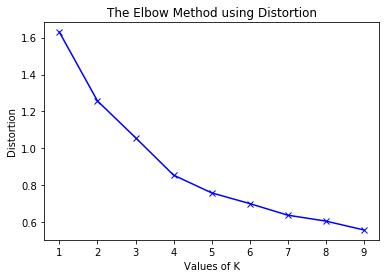

In [104]:
"""
It is calculated as the average of the squared distances from the cluster centers of the respective clusters. 
Typically, the Euclidean distance metric is used.
"""

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

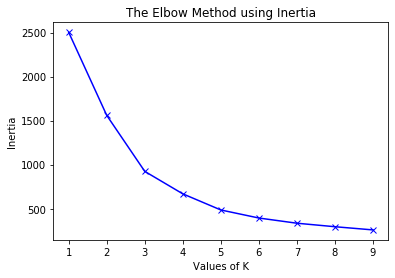

In [105]:
# It is the sum of squared distances of samples to their closest cluster center.

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### Build clustering with k = 4

In [106]:
df_pca = pd.DataFrame(X_pca, columns=['first_pc', 'second_pc'], index=df.index)

In [107]:
kmeanModel = KMeans(n_clusters=4).fit(df_pca)
df_pca['kmean_group'] = kmeanModel.labels_
df_pca

,first_pc,second_pc,kmean_group
ward_id,,,
1,-4.408536,2.002384,2
4,-2.603853,2.725069,2
6,-4.626114,2.137037,2
7,-4.119478,2.352878,2
8,-4.300062,2.497439,2
...,...,...,...
10492,0.217311,-0.857405,0
10495,-0.015329,-0.823463,0
10498,-0.298067,-1.036376,0


In [108]:
df['kmean_group'] = df_pca['kmean_group']
df[['first_pc', 'second_pc']] = df_pca[['first_pc', 'second_pc']]
df.head()

,ward,ward_level,pop_density,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home,kmean_group,first_pc,second_pc
ward_id,,,,,,,,,,,,
1,Phuong Phuc Xa,Phuong,24.562,0.056411,0.355236,0.379158,0.209195,5863,0.998636,2,-4.408536,2.002384
4,Phuong Truc Bach,Phuong,13.962,0.045294,0.325690,0.350318,0.278698,1948,1.000000,2,-2.603853,2.725069
6,Phuong Vinh Phuc,Phuong,33.376,0.062262,0.358529,0.376964,0.202246,6314,0.997466,2,-4.626114,2.137037
7,Phuong Cong Vi,Phuong,29.723,0.053570,0.349021,0.374429,0.222980,4357,0.998164,2,-4.119478,2.352878
8,Phuong Lieu Giai,Phuong,30.974,0.054686,0.350977,0.370850,0.223487,5639,0.999645,2,-4.300062,2.497439


Text(0, 0.5, 'Second principal component')

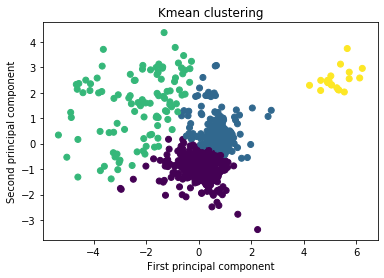

In [109]:
plt.scatter(x=df['first_pc'], y=df['second_pc'], c=df['kmean_group'])
plt.title("Kmean clustering")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [110]:
cluster_group = df.groupby(['kmean_group'])[features].mean()
cluster_group

,pop_density,children_0_14,female_15_54,male_15_59,elders,no_household,no_household_w_home
kmean_group,,,,,,,
0,2.696810,0.259265,0.276612,0.310986,0.154244,3494.210000,0.992004
1,4.368379,0.235262,0.265928,0.301216,0.264597,2463.447205,0.995241
2,34.026806,0.178562,0.313848,0.317159,0.190430,6774.679612,0.997949
3,2.158500,0.258928,0.143428,0.189860,0.407783,4071.850000,0.990908
